# **Project:** E-Commerce Customer Churn Analysis

## **Overview:**
An online retail company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [2]:
#Reading the dataset
df = pd.read_csv('E Commerce Dataset.csv')
OnlineRetail = df.copy() #Taking a copy of the data

In [3]:
#Retrieving the first 10 rows
OnlineRetail.head(10)

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,...,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,...,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,...,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,8,50009,1,-10000.0,Phone,3,9.0,E wallet,Male,NaN,...,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,...,Mobile,3,NaN,2,0,12.0,1.0,1.0,1.0,122.93


## **Exploratory Data Analysis** 

In [4]:
#Making Sure there are no inconsistent columns
OnlineRetail.columns

Index(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [5]:
#Dropping 'Unnamed: 0' Column
OnlineRetail.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
OnlineRetail.shape #Figuring out the shape of the data

(16890, 20)

In [7]:
OnlineRetail.info() #Figuring out columns' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress 

## **Figuring out null values**

In [8]:
OnlineRetail.isnull().sum() #Figuring out the number of null values in each column

CustomerID                        0
Churn                             0
Tenure                          783
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                1335
PreferredPaymentMode            600
Gender                            0
HourSpendOnApp                  765
NumberOfDeviceRegistered        600
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                   600
NumberOfAddress                   0
Complain                          0
OrderAmountHikeFromlastYear     795
CouponUsed                      768
OrderCount                      774
DaySinceLastOrder               921
CashbackAmount                    0
dtype: int64

## **Figuring Out Duplicate Values**

In [9]:
OnlineRetail.pivot_table(index=['CustomerID'], aggfunc ='size') #Figuring Out if there are any duplicates in column CustomerID

CustomerID
50001    3
50002    3
50003    3
50004    3
50005    3
        ..
55626    3
55627    3
55628    3
55629    3
55630    3
Length: 5630, dtype: int64

In [10]:
OnlineRetail.duplicated().sum() #Figuring out if there are any duplicate values (on row level)

11260

## **Quick Statistical Overview**

In [11]:
OnlineRetail.describe() #Quick Descriptive Summary (Numeric Data Type based)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,16890.000000,16890.000000,16107.000000,16890.000000,15555.000000,16125.000000,16290.000000,16890.000000,16890.000000,16890.000000,16095.000000,16122.000000,16116.000000,15969.000000,16890.000000
mean,52815.500000,0.168384,-176.226485,1.654707,15.671553,2.931535,3.686740,10470.403552,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.289097,0.374218,1353.431459,0.915335,8.556625,0.721881,1.024065,77841.558859,2.583433,0.451381,3.675257,1.894504,2.939497,3.654204,49.204123
min,50001.000000,0.000000,-10000.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.000000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54223.000000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,589314.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
OnlineRetail.describe(include='object') #Quick Descriptive Summary (Object Data Type based)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,16890,16290,16890,16890,16290
unique,4,7,4,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,8205,6687,9561,6150,8637


# **Phase One Initial Conclusion:**

- The dataset contains 20 columns, 10 of which has null values, Listed as the following:
	`Tenure`, `WarehouseToHome`, `PreferredPaymentMode`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `MaritalStatus`, `OrderAmountHikeFromlastYear`,
	`CouponUsed`, `OrderCount`, `DaySinceLastOrder`

- The dataset has duplicate values on row level and most importantly on CustomerID level, *(CustomerID should be unique as the customer should only exist once)*

- All columns have the right data type *(There's no need for data type conversion)*

- Quick statistical summary indicates that there could be potential outliers in:
	`Tenure`, `WarehouseToHome`, `SatisfactionScore`, `NumberOfAddress`, `CouponUsed`,
	`DaySinceLastOrder`



---

# **Data Cleansing**

### **Handling Duplicate Values**

In [13]:
OnlineRetail.drop_duplicates(keep='first', inplace = True) #Removing duplicates

In [14]:
OnlineRetail.duplicated().sum() #Validating the changes

0

In [15]:
OnlineRetail.shape #Revalidating the shape of the dataset

(5630, 20)

### **Handling/Figuring out outliers**

**Column: Tenure**

In [16]:
OnlineRetail['Tenure'].sort_values(ascending=True).value_counts() #Figuring out if there are extreme values

 1.0        676
 0.0        493
 8.0        257
 9.0        240
 7.0        216
 10.0       211
 5.0        201
 4.0        200
 3.0        192
 11.0       189
 6.0        182
 13.0       177
 12.0       174
 14.0       174
 2.0        166
 15.0       158
 16.0       148
 19.0       137
 18.0       120
 20.0       107
 17.0       105
-10000.0    100
 23.0        89
 21.0        83
 22.0        76
 24.0        75
 28.0        70
 30.0        66
 27.0        64
 26.0        60
 25.0        57
 29.0        54
 31.0        48
 50.0         1
 51.0         1
 60.0         1
 61.0         1
Name: Tenure, dtype: int64

In [17]:
#Tenure column has extrem unlogical value below 0 and outliers starting from a value of 50.0+
OnlineRetail = OnlineRetail[OnlineRetail['Tenure'] < 50.0] #Excluding values above 50.0

**There is an extreme value of -10000 which we could handle by replacing them with null values and handle nulls later on in the process**

In [18]:
OnlineRetail['Tenure'].replace(-10000, np.NaN, inplace=True) #Replacing -10000 with Null value

<ipython-input-18-14d801e34ad4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlineRetail['Tenure'].replace(-10000, np.NaN, inplace=True) #Replacing -10000 with Null value


In [19]:
OnlineRetail['Tenure'].unique() #Validating the changes

array([ 4.,  0., nan, 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
       13.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 31.])

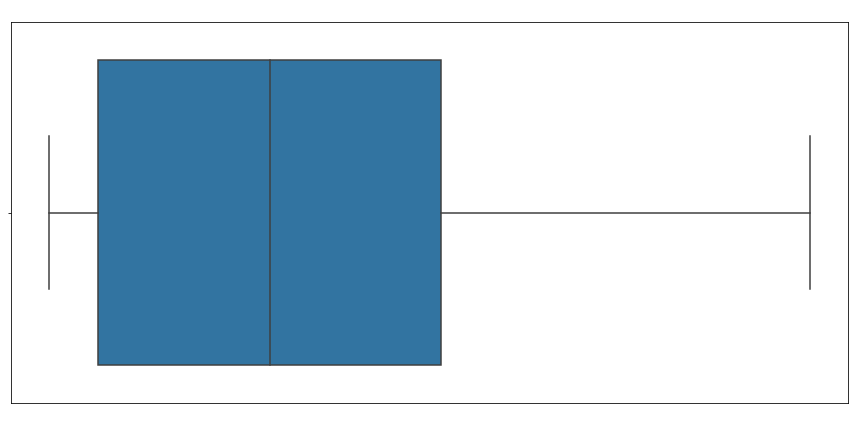

In [20]:
#Further Tenure column outliers configuration
plt.figure(figsize=(15,7))
Tenure_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['Tenure'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('Tenure Values', color='white')
Tenure_ax.set_title('Finding outliers in Tenure column',color= 'white')
plt.show()



---



**Column: WarehouseToHome**

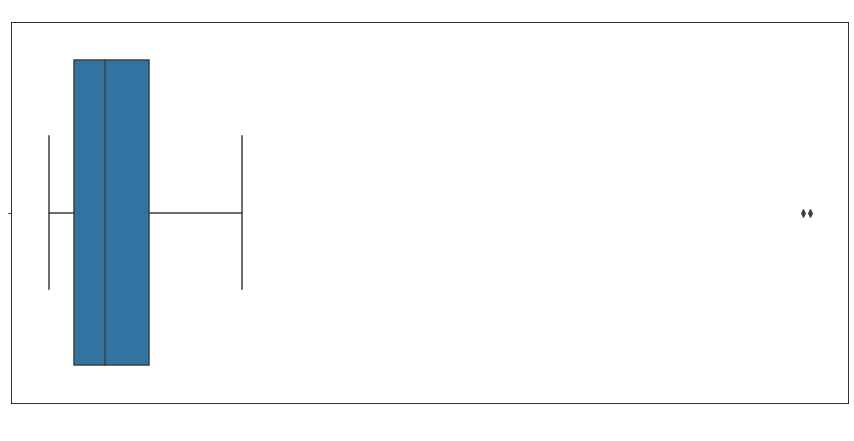

In [21]:
#Detecting Outliers WarehouseToHome Column
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('WarehouseToHome Values', color='white')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'white')
plt.show()

In [22]:
OnlineRetail['WarehouseToHome'].value_counts()

9.0      519
8.0      404
7.0      358
16.0     288
14.0     274
10.0     259
15.0     258
6.0      247
13.0     229
11.0     216
17.0     207
12.0     200
22.0      96
31.0      95
32.0      92
35.0      91
18.0      86
30.0      85
25.0      84
23.0      83
24.0      82
26.0      78
21.0      78
29.0      73
27.0      72
20.0      67
19.0      65
33.0      64
34.0      61
28.0      60
36.0      48
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

In [23]:
#Column WarehouseToHome has outliers on values 126.0 and 127.0 and Potentially 5.0
OnlineRetail = OnlineRetail[OnlineRetail['WarehouseToHome'] < 126.0]

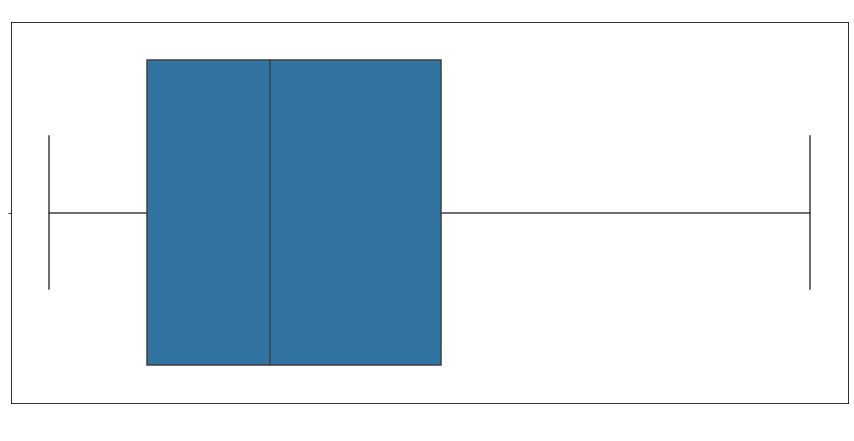

In [24]:
#Validating the changes
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('WarehouseToHome Values', color='white')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'white')
plt.show()



---




**Column: SatisfactionScore**

In [25]:
OnlineRetail['SatisfactionScore'].value_counts() #Figuring out if there's extreme values

3         1458
1         1009
5          949
4          912
2          510
589314      89
Name: SatisfactionScore, dtype: int64

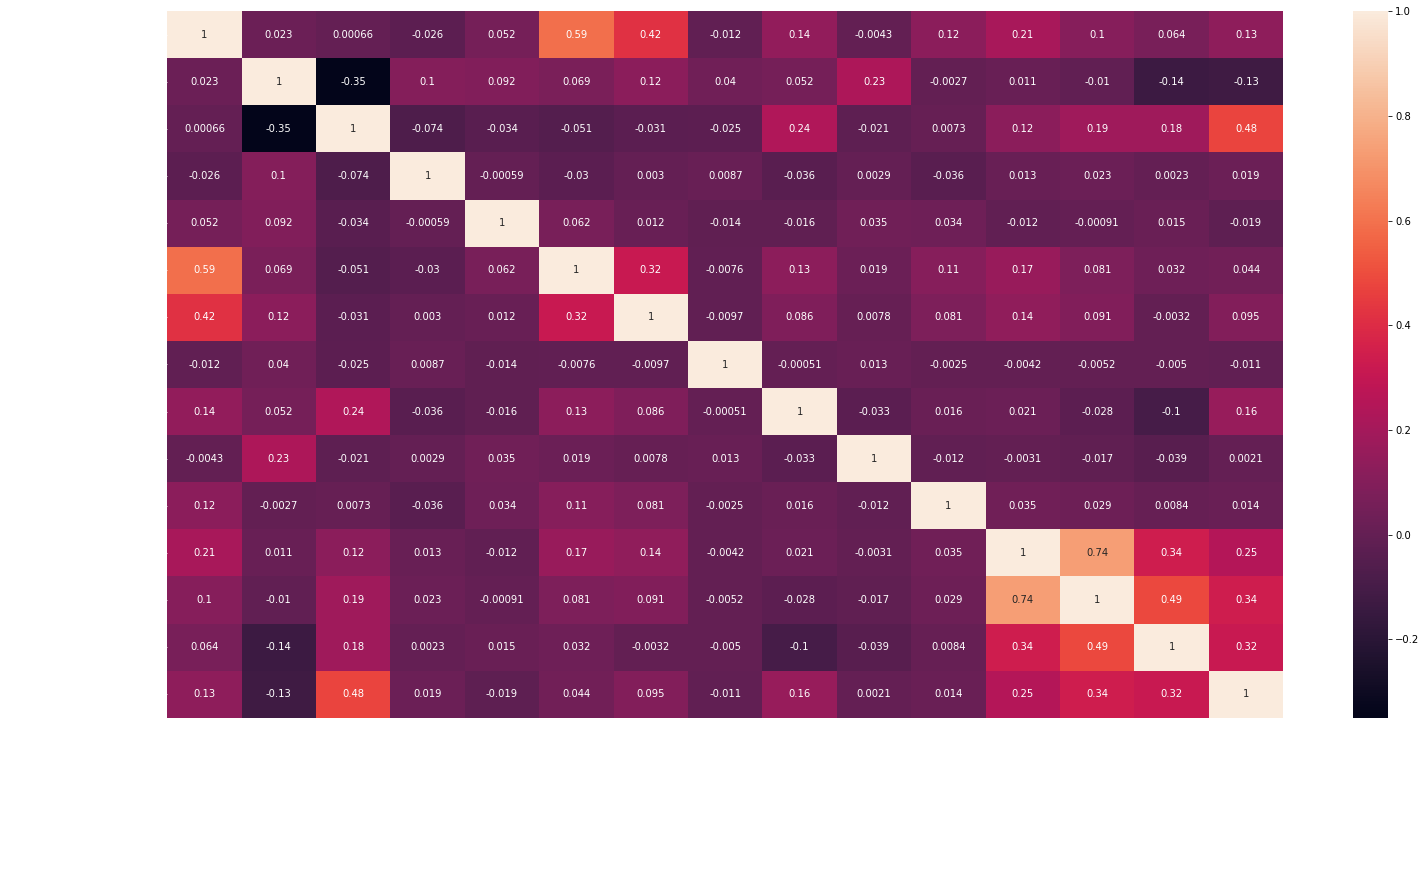

In [26]:
#Let's figure out the correlation between Satisfaction Score and other columns to figure out how to replace those values accurately
plt.figure(figsize=(25,13))
sns.heatmap(data = OnlineRetail.corr(), annot=True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [27]:
#Since Satisfaction Score has a correlation with Churn Column, Let's group the Satisfaction Score of 589314.0 with the churn rate to figure out how to handle the value accurately
Satisfaction_Handling = OnlineRetail[['Churn','SatisfactionScore']]
Satisfaction_Handling = Satisfaction_Handling[Satisfaction_Handling['SatisfactionScore'] == 589314.0]
Grouped = Satisfaction_Handling.groupby('Churn')['SatisfactionScore'].count()
Grouped

Churn
0    66
1    23
Name: SatisfactionScore, dtype: int64

In [28]:
#Figuring out the mean of SatisfactionScore Column in each Churn Category (1,0)
Sat_Mean = OnlineRetail[['Churn','SatisfactionScore']]
Sat_Mean_1 = Sat_Mean[Sat_Mean['Churn'] == 1]
Positive_Sat_Mean = np.round(Sat_Mean_1['SatisfactionScore'].mean(), decimals=3)
Sat_Mean_0 = Sat_Mean[Sat_Mean['Churn'] == 0]
Negative_Sat_Mean = np.round(Sat_Mean_0['SatisfactionScore'].mean(), decimals=3)

In [29]:
print(Positive_Sat_Mean)
print(Negative_Sat_Mean)

18027.505
9319.056


**The mean of each Churn Category is approximately 3, In terms of replacing 589314.0 with the mean, The column would be bias since the majority of the values are 3, Hence the optimal solution is to drop rows with values 589314**

In [30]:
#Finally, The best solution is to remove the 589314 values
OnlineRetail = OnlineRetail[OnlineRetail['SatisfactionScore'] != 589314]

In [31]:
OnlineRetail['SatisfactionScore'].value_counts() #Validating the changes

3    1458
1    1009
5     949
4     912
2     510
Name: SatisfactionScore, dtype: int64



---



**Column: NumberOfAddress**

In [32]:
OnlineRetail['NumberOfAddress'].value_counts() #Figuring out if there are extreme values

3     1179
2     1056
4      520
5      500
6      347
1      292
8      256
9      211
7      209
10     178
11      87
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

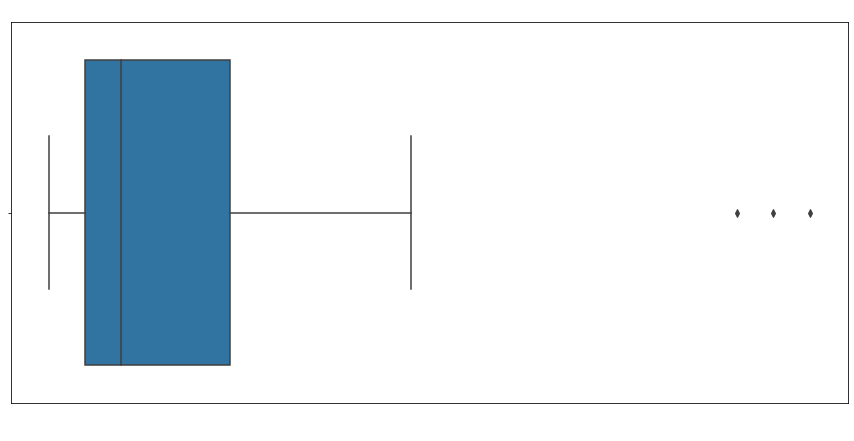

In [33]:
#Detecting Outliers NumberOfAddress Column
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('NumberOfAddress Values', color='white')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'white')
plt.show()

In [34]:
#Handling Extreme Values
OnlineRetail = OnlineRetail[OnlineRetail['NumberOfAddress'] < 20]

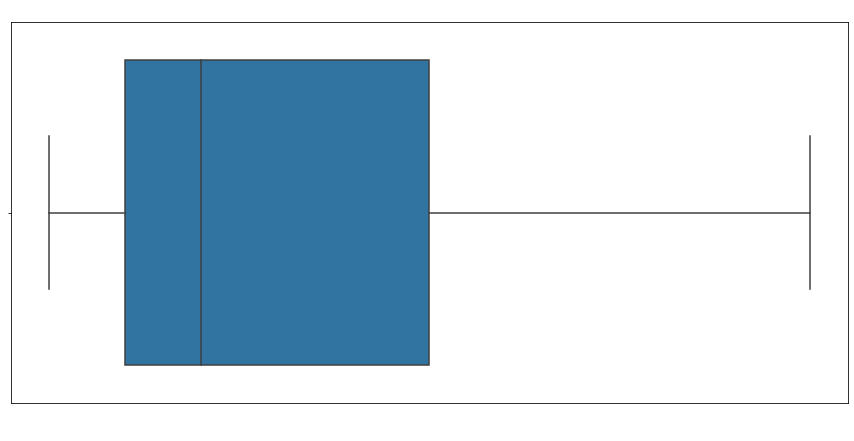

In [35]:
#Validating the changes
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('NumberOfAddress Values', color='white')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'white')
plt.show()



---



**Column: CouponUsed**

In [36]:
OnlineRetail['CouponUsed'].value_counts() #Figuring out if there are extreme values

1.0     1770
2.0     1180
0.0      755
3.0      313
4.0      179
5.0      118
6.0       99
7.0       80
8.0       39
10.0      13
9.0       12
11.0      11
12.0       9
13.0       8
14.0       4
16.0       2
Name: CouponUsed, dtype: int64

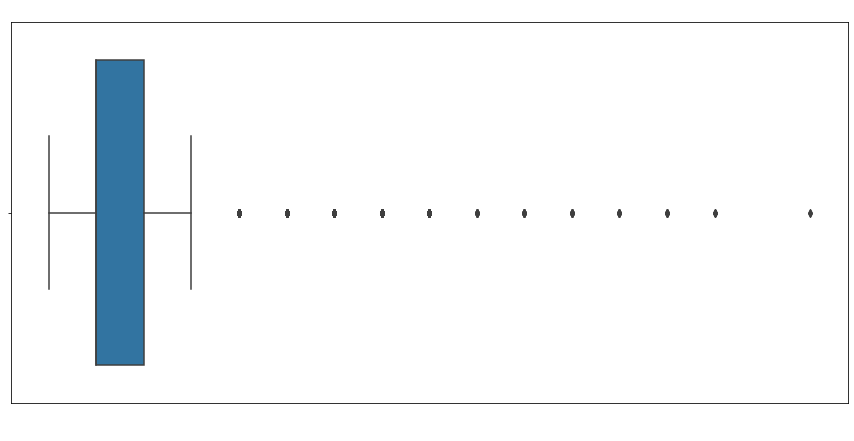

In [37]:
#Detecting outliers in CouponUsed Column
plt.figure(figsize=(15,7))
CouponUsed_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CouponUsed'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('CouponUsed Values', color='white')
CouponUsed_ax.set_title('Finding outliers in CouponUsed column',color= 'white')
plt.show()

***Outliers in column `CouponUsed` don't represent wrong measurement and they could provide useful information, Hence, I've decided to leave them***



---



**Column: DaySinceLastOrder**

In [38]:
OnlineRetail['DaySinceLastOrder'].value_counts() #Figuring Out if there are extreme values.

3.0     809
2.0     613
1.0     542
8.0     488
7.0     383
4.0     378
0.0     296
9.0     280
5.0     212
10.0    153
6.0     100
11.0     85
12.0     67
13.0     47
14.0     33
17.0     17
15.0     16
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

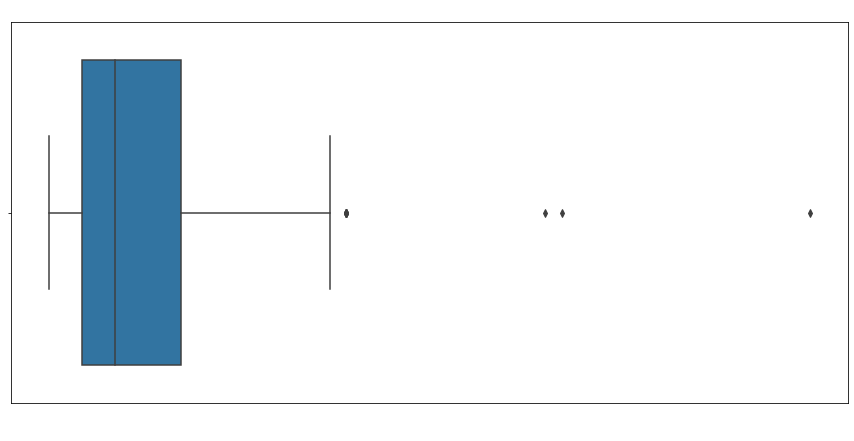

In [39]:
#There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.
plt.figure(figsize=(15,7))
DaySinceLastOrder_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['DaySinceLastOrder'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('DaySinceLastOrder Values', color='white')
DaySinceLastOrder_ax.set_title('Finding outliers in DaySinceLastOrder column',color= 'white')
plt.show()

**There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.**



---



## **Outliers Conclusion:**
**As Expected, There were outliers in columns:** 	`Tenure`, `WarehouseToHome`, `SatisfactionScore`, `NumberOfAddress`, `CouponUsed`, `DaySinceLastOrder`
	
  **Now, Let's make sure that the other columns don't contain outliers.**
  `Churn`, `CityTier`, `HoursSpendOnApp`, `NumberOfDeviceRegistered`, `Complain`, `OrderAmountHikeFromlastYear`, `CashbackAmount`



---



**Column: Churn**

In [40]:
OnlineRetail['Churn'].value_counts() #Figuring Out if there are extreme values.

0    4107
1     728
Name: Churn, dtype: int64

**Column: CityTier**

In [41]:
OnlineRetail['CityTier'].value_counts() #Figuring Out if there are extreme values.

1    3086
3    1546
2     203
Name: CityTier, dtype: int64

**Column: HoursSpendOnApp**

In [42]:
OnlineRetail['HourSpendOnApp'].value_counts() #Figuring Out if there are extreme values.

3.0    2330
2.0    1130
4.0    1101
1.0      32
5.0       3
0.0       2
Name: HourSpendOnApp, dtype: int64

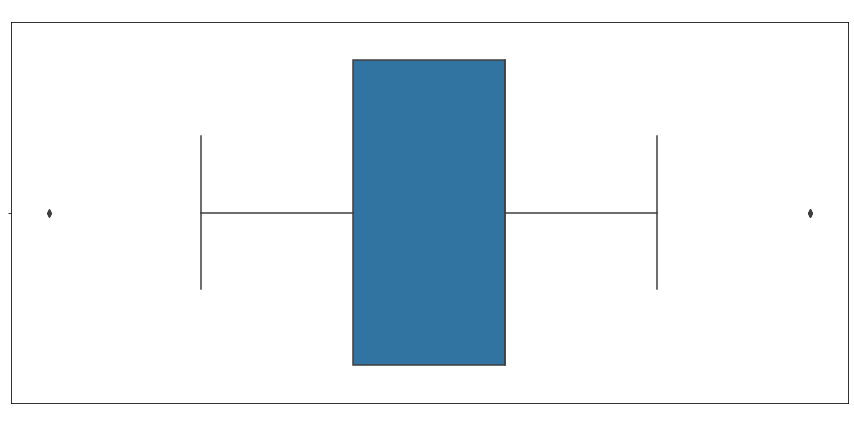

In [43]:
#Visualizing outliers using BoxPlot
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('HoursSpendOnApp Values', color='white')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'white')
plt.show()

In [44]:
#Handling outliers
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] > 0.0]
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] < 5.0]

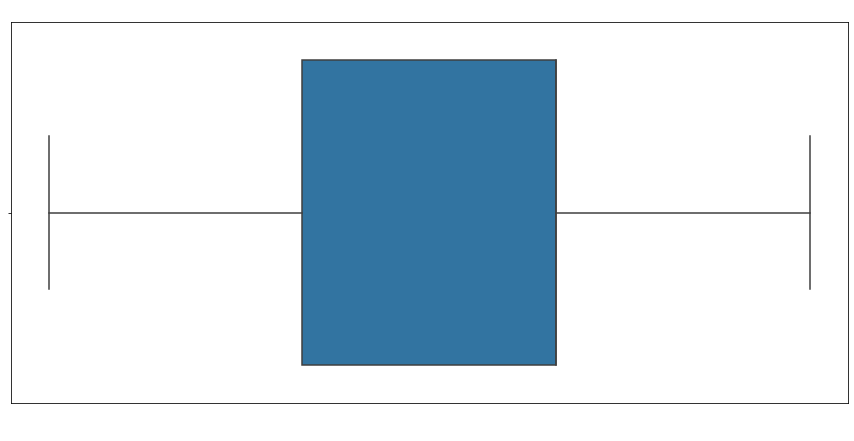

In [45]:
#Validating the changes
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('HoursSpendOnApp Values', color='white')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'white')
plt.show()

**Column: NumberOfDeviceRegistered**

In [46]:
OnlineRetail['NumberOfDeviceRegistered'].value_counts() #Figuring Out if there are extreme values.

4.0    1961
3.0    1140
5.0     775
2.0     239
1.0     156
6.0     150
Name: NumberOfDeviceRegistered, dtype: int64

**Column: Complain**

In [47]:
OnlineRetail['Complain'].value_counts() #Figuring Out if there are extreme values.

0    3285
1    1308
Name: Complain, dtype: int64

**Column: OrderAmountHikeFromlastYear**

In [48]:
OnlineRetail['OrderAmountHikeFromlastYear'].value_counts() #Figuring Out if there are extreme values.

14.0    610
12.0    596
13.0    585
15.0    472
11.0    280
16.0    260
18.0    259
19.0    259
17.0    248
20.0    191
21.0    159
22.0    147
23.0    119
24.0     67
25.0     59
26.0     32
Name: OrderAmountHikeFromlastYear, dtype: int64

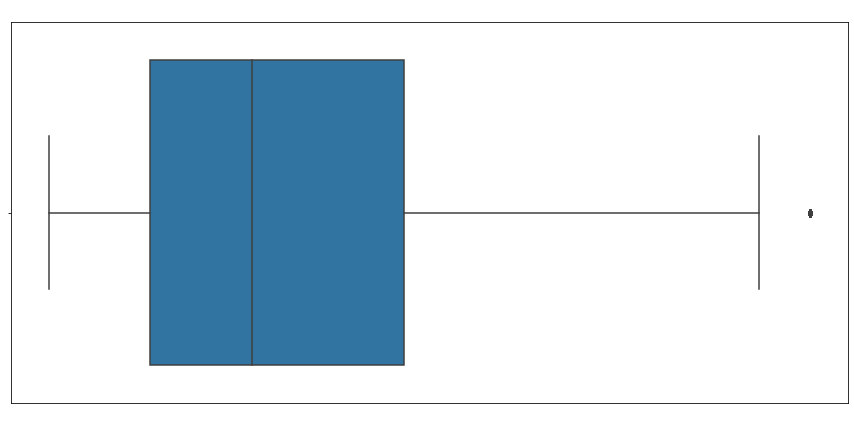

In [49]:
plt.figure(figsize=(15,7))
OrderAmountHikeFromlastYear_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['OrderAmountHikeFromlastYear'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='white')
OrderAmountHikeFromlastYear_ax.set_title('Finding outliers in OrderAmountHikeFromlastYear column',color= 'white')
plt.show()
#Since this column presents the increase percentage, Outliers is not problematic in this case

**Column: CashbackAmount**

In [50]:
OnlineRetail['CashbackAmount'].value_counts().sort_index() #Figuring Out if there are extreme values.

0.00      4
12.00     1
25.00     4
37.00     1
56.00     1
         ..
323.59    2
324.26    2
324.43    2
324.73    2
324.99    2
Name: CashbackAmount, Length: 2234, dtype: int64

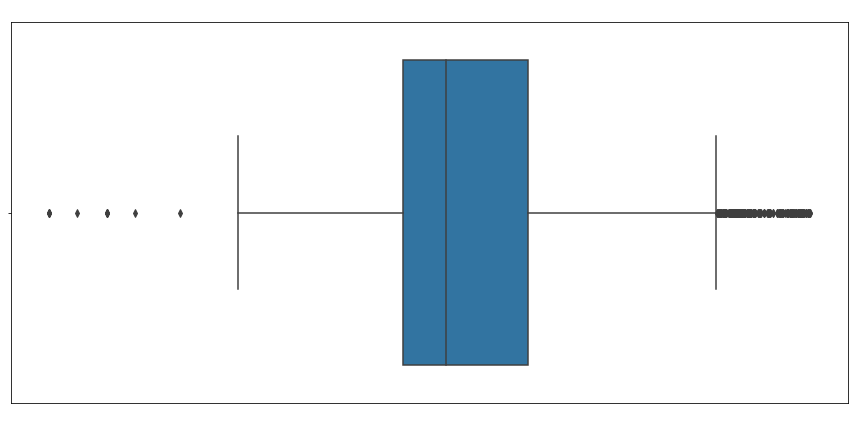

In [51]:
#Detecting outliers in CashbackAmount
plt.figure(figsize=(15,7))
CashbackAmount_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CashbackAmount'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('CashbackAmount Values', color='white')
CashbackAmount_ax.set_title('Finding outliers in CashbackAmount column',color= 'white')
plt.show()

**Since this column represents an average cash back amount on monthly basis, it is normal to be a fluctuated amount and hence the outliers could be left as it is**



---



 ## **Handling/Figuring out null values and Handling/Figuring out wrong values**

In [52]:
OnlineRetail.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                          85
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode           170
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered       172
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                  155
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    250
CouponUsed                     243
OrderCount                     247
DaySinceLastOrder              290
CashbackAmount                   0
dtype: int64

# **Handling/Figuring wrong values**

In [53]:
OnlineRetail.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### **Column: Churn**

In [54]:
#Churn
OnlineRetail['Churn'].unique()

array([1, 0])

### **Column: Tenure**

In [55]:
#Tenure
OnlineRetail['Tenure'].unique()

array([ 4.,  0., 11.,  9., 19., 20., 14.,  8.,  5., 30., 13., 23.,  3.,
       18., 29., 26., 28.,  7., 24., 25., 10., 15., nan, 22.,  1., 27.,
        2., 16., 12.,  6., 21., 17., 31.])

### **Column: PreferredLoginDevice**

In [56]:
#PreferredLoginDevice
OnlineRetail['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer', '0', 'Phone'], dtype=object)

In [57]:
#Handling 0 value in PreferredLoginDevice
OnlineRetail['PreferredLoginDevice'].replace('0','Other',inplace=True)

### **Column: CityTier**

In [58]:
#CityTier
OnlineRetail['CityTier'].unique()

array([3, 1, 2])

### **Column: WarehouseToHome**

In [59]:
#WarehouseToHome
OnlineRetail['WarehouseToHome'].unique()

array([ 6., 22., 18., 11., 15., 13., 20., 12., 29., 26., 14., 10., 30.,
       17.,  8., 19.,  9., 27., 35., 24., 16., 33., 32., 23., 28., 31.,
       34.,  5., 25., 21.,  7., 36.])

### **Column: PreferredPaymentMode**

In [60]:
#PreferredPaymentMode
OnlineRetail['PreferredPaymentMode'].unique()

array(['Debit Card', 'Cash on Delivery', 'COD', 'CC', 'Credit Card',
       'E wallet', nan, 'UPI'], dtype=object)

In [61]:
#Handling 'COD' and 'CC' values
OnlineRetail['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True) #Replacing COD with Cash On Delivery
OnlineRetail['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True) #Replacing CC with Credit Card
OnlineRetail['PreferredPaymentMode'].fillna(value='Other', inplace=True) #Replacing nan with Other

### **Column: Gender**

In [62]:
#Gender
OnlineRetail['Gender'].unique()

array(['Female', 'Male', 'f', 'm'], dtype=object)

In [63]:
#Handling 'f' and 'm' value in Gender
OnlineRetail['Gender'].replace('f','Female',inplace=True)
OnlineRetail['Gender'].replace('m','Male',inplace=True)

### **Column: HourSpendOnApp**

In [64]:
#HourSpendOnApp
OnlineRetail['HourSpendOnApp'].unique()

array([3., 2., 1., 4.])

### **Column: NumberOfDeviceRegistered**

In [65]:
#NumberOfDeviceRegistered
OnlineRetail['NumberOfDeviceRegistered'].unique()

array([ 3.,  5.,  4., nan,  2.,  1.,  6.])

### **Column: PreferedOrderCat**

In [66]:
#PreferedOrderCat
OnlineRetail['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Mobile', 'Grocery'], dtype=object)

In [67]:
#Handling 'Mobile' value in PreferedOrderCat
OnlineRetail['PreferedOrderCat'].replace('Mobile','Mobile Phone',inplace=True)

### **Column: SatisfactionScore**

In [68]:
#SatisfactionScore
OnlineRetail['SatisfactionScore'].unique()

array([2, 5, 3, 4, 1])

### **Column: MaritalStatus**

In [69]:
#MaritalStatus
OnlineRetail['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

### **Column: NumberOfAddress**

In [70]:
#NumberOfAddress
OnlineRetail['NumberOfAddress'].unique()

array([ 9,  2, 10,  1,  5,  4,  3,  8,  6,  7, 11])

### **Column: Complain**

In [71]:
#Complain
OnlineRetail['Complain'].unique()

array([1, 0])

### **Column: OrderAmountHikeFromlastYear**

In [72]:
#OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].unique()

array([11., 22., nan, 13., 17., 16., 24., 18., 12., 15., 14., 20., 25.,
       23., 19., 21., 26.])

### **Column: CouponUsed**

In [73]:
#CouponUsed
OnlineRetail['CouponUsed'].unique()

array([ 1.,  4.,  9.,  0.,  2.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13.,  8., 14., 16.])

### **Column: OrderCount**

In [74]:
#OrderCount
OnlineRetail['OrderCount'].unique()

array([ 1.,  6., 15.,  2.,  4.,  7.,  3.,  9., nan, 11.,  5., 12.,  8.,
       13., 10., 14., 16.])

### **Column: DaySinceLastOrder**

In [75]:
#DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].unique()

array([ 5.,  7.,  8.,  0.,  2.,  3.,  6.,  4., 11.,  1.,  9., 15., nan,
       13., 12., 10., 16., 17., 14., 30., 46., 18., 31.])

### **Column: CashbackAmount**

In [76]:
#CashbackAmount
OnlineRetail['CashbackAmount'].unique()

array([159.93, 139.19, 295.45, ..., 173.78, 159.82, 172.87])



---




# **Feature Engineering:** One Hot Encoding

### `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat` and `MaritalStatus`

In [77]:
#Turning Nominal Object columns into seperate columns
OneHot_Columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
OnlineRetail = pd.get_dummies(OnlineRetail, columns= OneHot_Columns)

In [78]:
OnlineRetail.columns #Validating the changes

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Other', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_Other',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

# **Handling nulls**
## *Method 1: Dropping nulls*

In [79]:
#Let's take a copy and drop nulls
OnlineRetail_NoNull = OnlineRetail.copy()
OnlineRetail_NoNull.dropna(inplace=True)

#**Modeling:** Decision Tree

In [80]:
#Spliting the dataset into train test (70,30)
y = OnlineRetail_NoNull['Churn']
x = OnlineRetail_NoNull.drop('Churn', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=0)

In [81]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [82]:
dt_y_pred_test = dt.predict(x_test)
dt_y_pred_train = dt.predict(x_train)

In [83]:
print(classification_report(y_train, dt_y_pred_train)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00       391

    accuracy                           1.00      2349
   macro avg       1.00      1.00      1.00      2349
weighted avg       1.00      1.00      1.00      2349



In [84]:
print(classification_report(y_test, dt_y_pred_test)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       840
           1       0.78      0.83      0.80       167

    accuracy                           0.93      1007
   macro avg       0.87      0.89      0.88      1007
weighted avg       0.93      0.93      0.93      1007



#**Modeling:** Random Forest

In [85]:
rn = RandomForestClassifier()
rn.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
rn_pred_train = rn.predict(x_train)
rn_pred_test = rn.predict(x_test)

In [87]:
print(classification_report(y_train, rn_pred_train)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00       391

    accuracy                           1.00      2349
   macro avg       1.00      1.00      1.00      2349
weighted avg       1.00      1.00      1.00      2349



In [88]:
print(classification_report(y_test, rn_pred_test)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       840
           1       0.97      0.73      0.83       167

    accuracy                           0.95      1007
   macro avg       0.96      0.86      0.90      1007
weighted avg       0.95      0.95      0.95      1007



#**Method 1 Conclusion:**
### Handling nulls through dropping them results in a not bad model, Yet, Let's try how the model would perform if we filled in the nulls.



---



##**Method 2:** Filling nulls with Multivariate Imputation By Chained Equations algorithm

In [89]:
#Taking a copy of columns with null values
df_missing_columns = OnlineRetail.filter(
    ['CustomerID','Tenure','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','CouponUsed',
     'OrderCount', 'DaySinceLastOrder'], axis=1).copy()

#Defining MICE imputer and filling in missing values
missing_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, 
                                   imputation_order='ascending')
df_missing_imputed = pd.DataFrame(missing_imputer.fit_transform(df_missing_columns), 
                                  columns=df_missing_columns.columns)
Cleaned_OnlineRetail = OnlineRetail.copy()
Cleaned_OnlineRetail.drop(['Tenure','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','CouponUsed',
     'OrderCount', 'DaySinceLastOrder'], axis = 1 , inplace = True)
OnlineRetail_MICE = Cleaned_OnlineRetail.set_index('CustomerID').join(df_missing_imputed.set_index('CustomerID'))
OnlineRetail_MICE.reset_index(inplace=True)

In [90]:
OnlineRetail_MICE.isnull().sum()

CustomerID                               0
Churn                                    0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Other               0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_Other               0
PreferredPaymentMode_UPI                 0
Gender_Female                            0
Gender_Male                              0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrd

#**Modeling:** Decision Tree

In [91]:
#Spliting the dataset into train test (70,30)
MICE_y = OnlineRetail_MICE['Churn']
MICE_x = OnlineRetail_MICE.drop('Churn', axis=1)
MICE_x_train, MICE_x_test, MICE_y_train, MICE_y_test = train_test_split(MICE_x, MICE_y, test_size = 0.3, stratify=MICE_y, random_state=0)

In [92]:
#Fitting and Predicting
dt.fit(MICE_x_train,MICE_y_train)
MICE_dt_y_pred_test = dt.predict(MICE_x_test)
MICE_dt_y_pred_train = dt.predict(MICE_x_train)

In [93]:
print(classification_report(MICE_y_train, MICE_dt_y_pred_train)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2740
           1       1.00      1.00      1.00       475

    accuracy                           1.00      3215
   macro avg       1.00      1.00      1.00      3215
weighted avg       1.00      1.00      1.00      3215



In [94]:
print(classification_report(MICE_y_test, MICE_dt_y_pred_test)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1175
           1       0.77      0.75      0.76       203

    accuracy                           0.93      1378
   macro avg       0.86      0.85      0.86      1378
weighted avg       0.93      0.93      0.93      1378



#**Modeling:** Random Forest

In [95]:
rn.fit(MICE_x_train,MICE_y_train)
MICE_rn_pred_train = rn.predict(MICE_x_train)
MICE_rn_pred_test = rn.predict(MICE_x_test)

In [96]:
print(classification_report(MICE_y_train, MICE_rn_pred_train)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2740
           1       1.00      1.00      1.00       475

    accuracy                           1.00      3215
   macro avg       1.00      1.00      1.00      3215
weighted avg       1.00      1.00      1.00      3215



In [97]:
print(classification_report(MICE_y_test, MICE_rn_pred_test)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1175
           1       0.91      0.69      0.79       203

    accuracy                           0.94      1378
   macro avg       0.93      0.84      0.88      1378
weighted avg       0.94      0.94      0.94      1378



#**Method 2 Conclusion:**
### Decision Tree returned an OK result yet Method 1 was better, Yet, In Method 2 Random Forest, The model was off or can be considered inaccurate.



---



---



##**Method 3:** Filling nulls with `interpolate` in Pandas that could predict the nulls using the correlation with other columns.
**The nulls are handled first through distributions**

In [98]:
OnlineRetail.isnull().sum() #Validating that there are nulls

CustomerID                                 0
Churn                                      0
Tenure                                    85
CityTier                                   0
WarehouseToHome                            0
HourSpendOnApp                             0
NumberOfDeviceRegistered                 172
SatisfactionScore                          0
NumberOfAddress                            0
Complain                                   0
OrderAmountHikeFromlastYear              250
CouponUsed                               243
OrderCount                               247
DaySinceLastOrder                        290
CashbackAmount                             0
PreferredLoginDevice_Computer              0
PreferredLoginDevice_Mobile Phone          0
PreferredLoginDevice_Other                 0
PreferredLoginDevice_Phone                 0
PreferredPaymentMode_Cash on Delivery      0
PreferredPaymentMode_Credit Card           0
PreferredPaymentMode_Debit Card            0
PreferredP

## **Handling nulls in the following columns:**
### `Tenure`, `NumberOfDeviceRegistered`, `NumberOfDeviceRegistered`, `CouponUsed`, `OrderCount` and `DaySinceLastOrder`

### **Column: Tenure**

In [99]:
OnlineRetail_Interpolate = OnlineRetail.copy() #Taking a copy of the dataframe

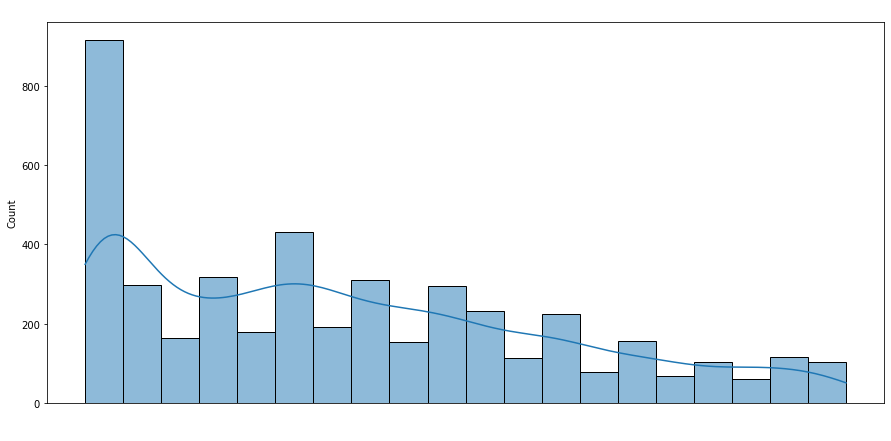

In [100]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolate_Tenure_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['Tenure'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolate_Tenure_plt.set_title('Tenure Column Distribution',color= 'white')
plt.xlabel('Tenure Values', color='white')
plt.show()

In [101]:
OnlineRetail_Interpolate['Tenure'].interpolate(method = 'linear', inplace=True)

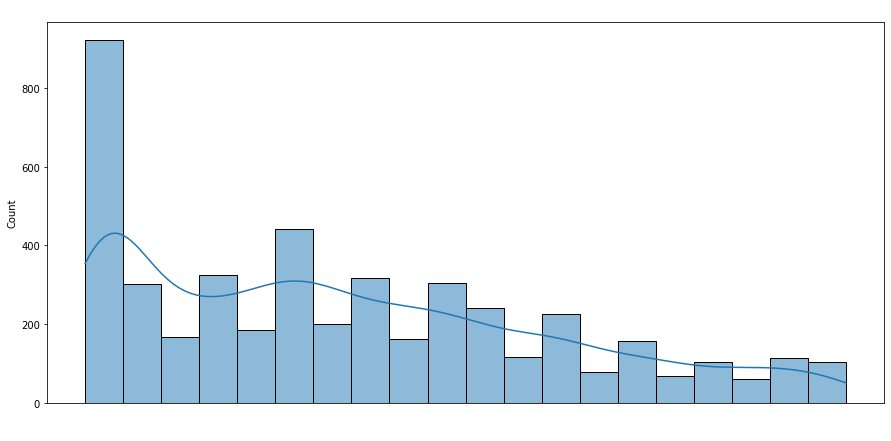

In [102]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolate_Tenure_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['Tenure'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolate_Tenure_plt.set_title('Tenure Column Distribution',color= 'white')
plt.xlabel('Tenure Values', color='white')
plt.show()

In [103]:
OnlineRetail_Interpolate['Tenure'].isnull().sum() #Validating the changes in nulls

0

### **Column: NumberOfDeviceRegistered**

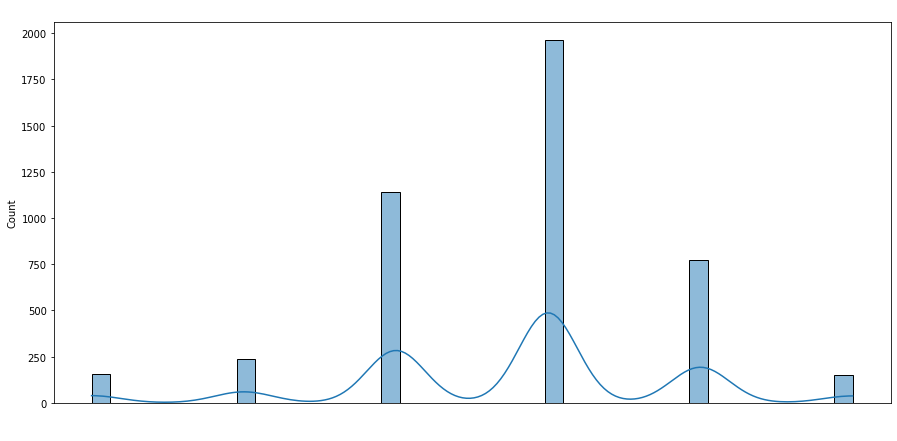

In [104]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_NumberOfDeviceRegistered_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['NumberOfDeviceRegistered'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_NumberOfDeviceRegistered_plt.set_title('NumberOfDeviceRegistered Column Distribution',color= 'white')
plt.xlabel('NumberOfDeviceRegistered Values', color='white')
plt.show()

In [105]:
OnlineRetail_Interpolate['NumberOfDeviceRegistered'].interpolate(method = 'linear', inplace=True)

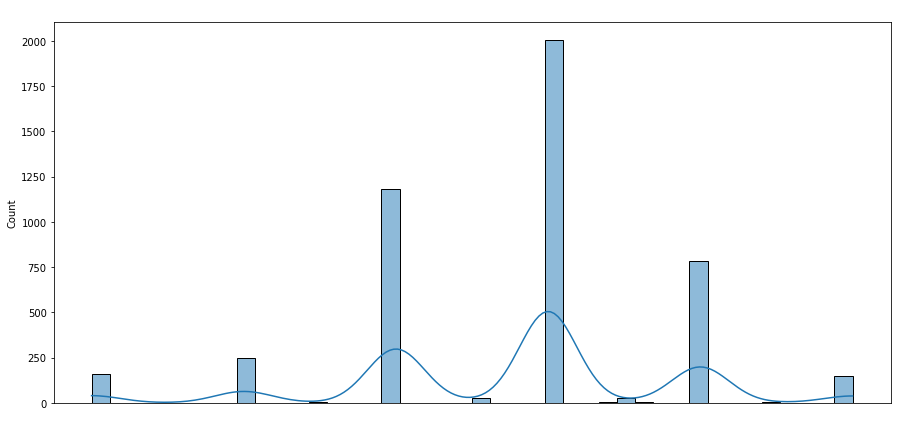

In [106]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_NumberOfDeviceRegistered_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['NumberOfDeviceRegistered'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_NumberOfDeviceRegistered_plt.set_title('NumberOfDeviceRegistered Column Distribution',color= 'white')
plt.xlabel('NumberOfDeviceRegistered Values', color='white')
plt.show()

In [107]:
OnlineRetail_Interpolate['NumberOfDeviceRegistered'].isnull().sum() #Validating the changes in nulls

0

### **Column: OrderAmountHikeFromlastYear**

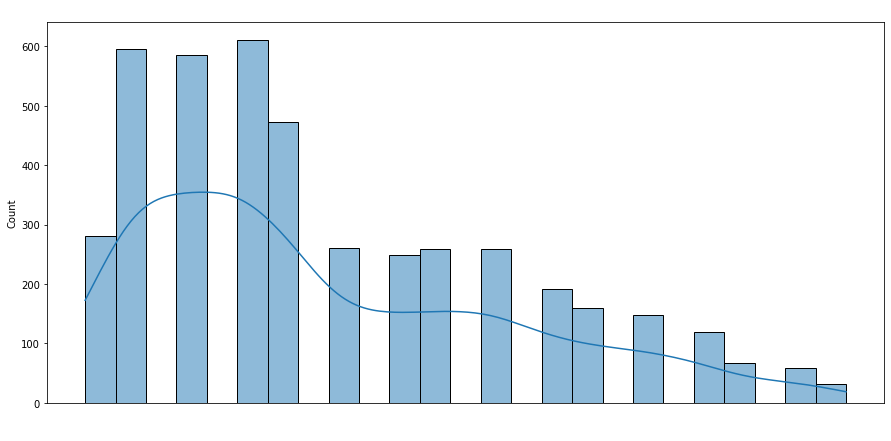

In [108]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_OrderAmountHikeFromlastYear_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_OrderAmountHikeFromlastYear_plt.set_title('OrderAmountHikeFromlastYear Column Distribution',color= 'white')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='white')
plt.show()

In [109]:
OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].interpolate(method = 'linear', inplace=True)

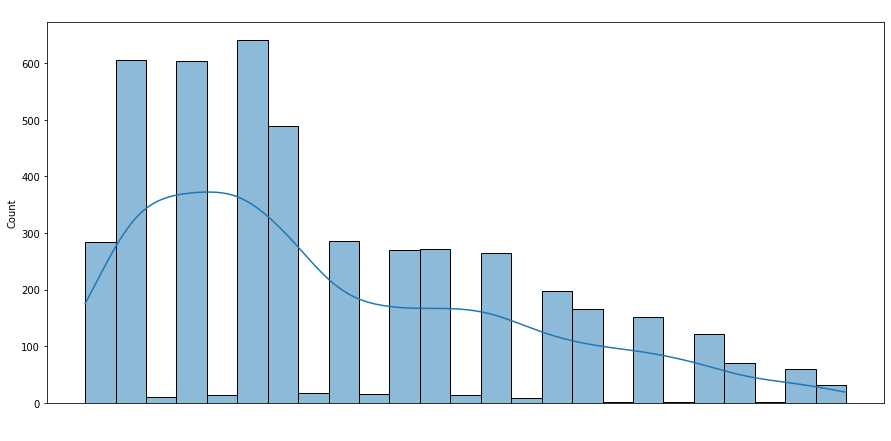

In [110]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_OrderAmountHikeFromlastYear_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_OrderAmountHikeFromlastYear_plt.set_title('OrderAmountHikeFromlastYear Column Distribution',color= 'white')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='white')
plt.show()

In [111]:
OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].isnull().sum() #Validating the changes in nulls

0

### **Column: CouponUsed**

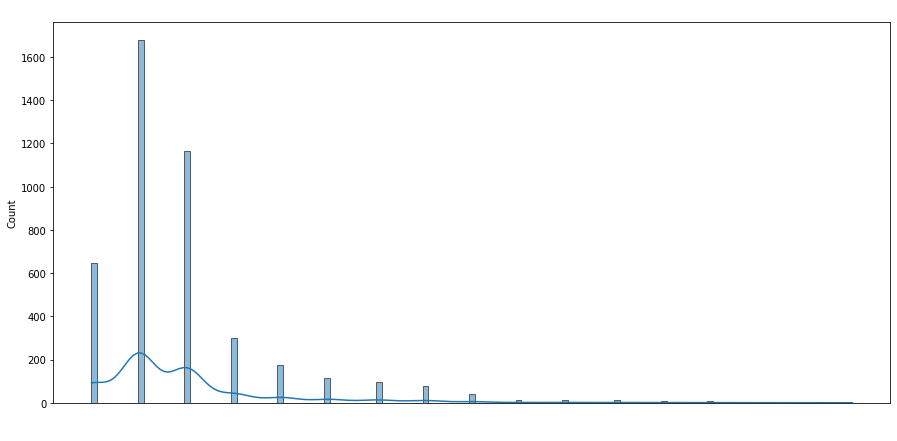

In [112]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_CouponUsed_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['CouponUsed'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_CouponUsed_plt.set_title('CouponUsed Column Distribution',color= 'white')
plt.xlabel('CouponUsed Values', color='white')
plt.show()

In [113]:
OnlineRetail_Interpolate['CouponUsed'].interpolate(method = 'linear', inplace=True)

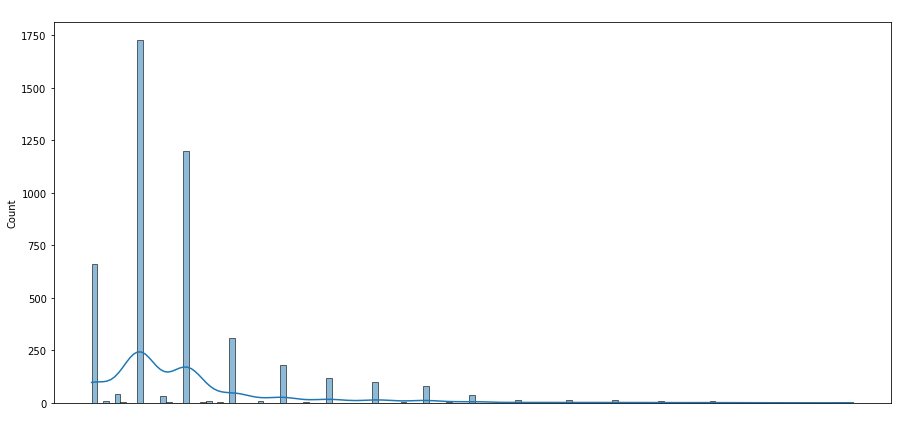

In [114]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_CouponUsed_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['CouponUsed'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_CouponUsed_plt.set_title('CouponUsed Column Distribution',color= 'white')
plt.xlabel('CouponUsed Values', color='white')
plt.show()

In [115]:
OnlineRetail_Interpolate['CouponUsed'].isnull().sum() #Validating the changes in nulls

0

### **Column: OrderCount**

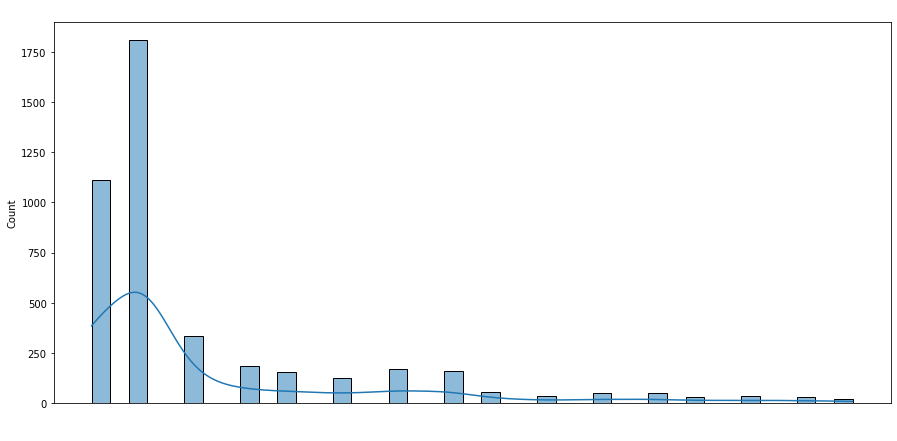

In [116]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_OrderCount_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderCount'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_OrderCount_plt.set_title('OrderCount Column Distribution',color= 'white')
plt.xlabel('OrderCount Values', color='white')
plt.show()

In [117]:
OnlineRetail_Interpolate['OrderCount'].interpolate(method = 'linear', inplace=True)

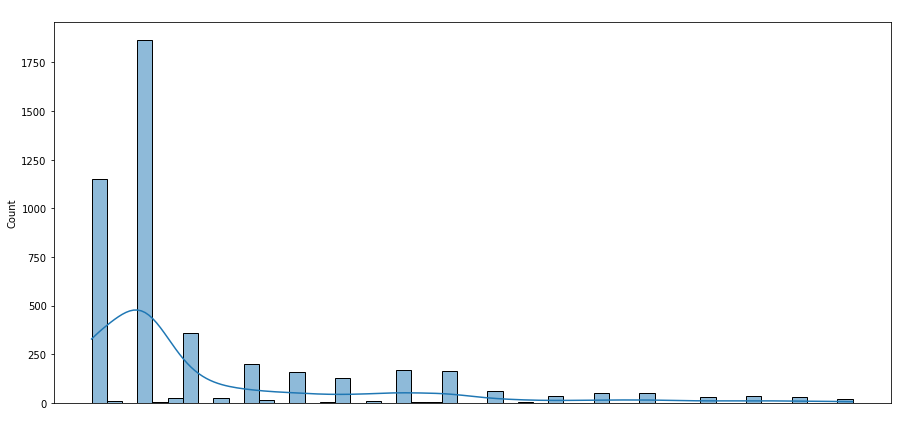

In [118]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_OrderCount_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderCount'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_OrderCount_plt.set_title('OrderCount Column Distribution',color= 'white')
plt.xlabel('OrderCount Values', color='white')
plt.show()

In [119]:
OnlineRetail_Interpolate['OrderCount'].isnull().sum() #Validating the changes in nulls

0

### **Column: DaySinceLastOrder**

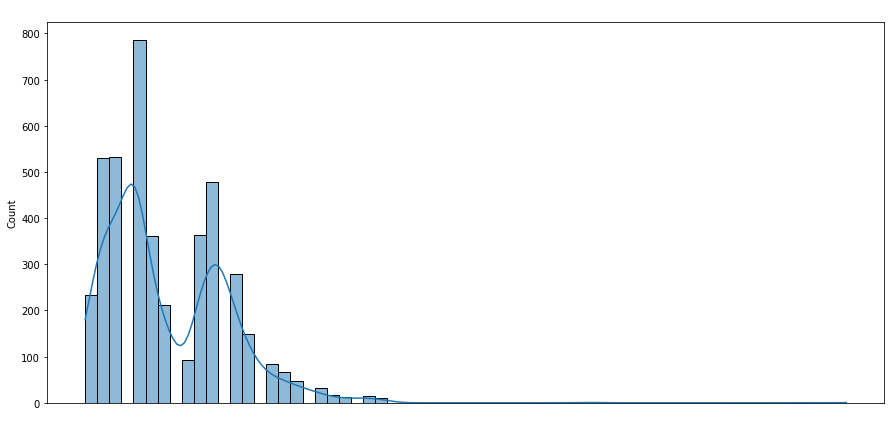

In [120]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_DaySinceLastOrder_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['DaySinceLastOrder'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_DaySinceLastOrder_plt.set_title('DaySinceLastOrder Column Distribution',color= 'white')
plt.xlabel('DaySinceLastOrder Values', color='white')
plt.show()

In [121]:
OnlineRetail_Interpolate['DaySinceLastOrder'].interpolate(method = 'linear', inplace=True)

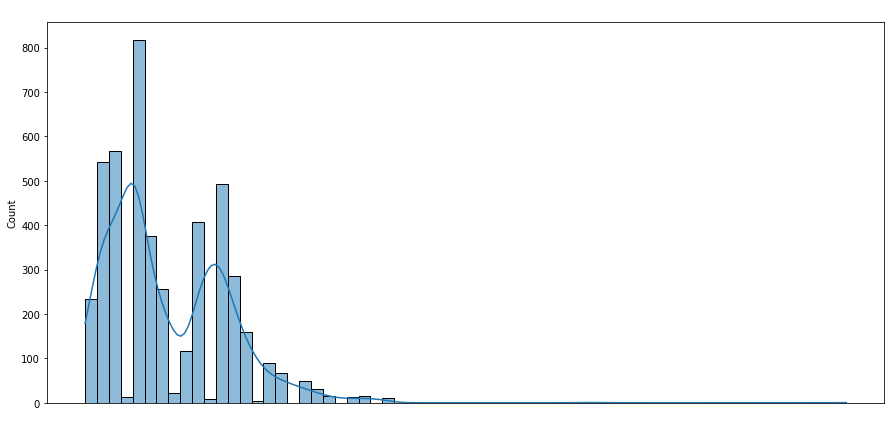

In [122]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_DaySinceLastOrder_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['DaySinceLastOrder'], kde=True)
plt.tick_params(axis='x', colors='white')
Interpolat_DaySinceLastOrder_plt.set_title('DaySinceLastOrder Column Distribution',color= 'white')
plt.xlabel('DaySinceLastOrder Values', color='white')
plt.show()

In [123]:
OnlineRetail_Interpolate['DaySinceLastOrder'].isnull().sum() #Validating the changes in nulls

0

###**Nulls:** Final Validation

In [124]:
OnlineRetail_Interpolate.isnull().sum() #Validating the changes in nulls

CustomerID                               0
Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Other               0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPa

#**Modeling:** Decision Tree


In [125]:
#Spliting the dataset into train test (70,30)
OnlineRetail_Interpolate_y = OnlineRetail_Interpolate['Churn']
OnlineRetail_Interpolate_x = OnlineRetail_Interpolate.drop('Churn', axis=1)
OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_x_test, OnlineRetail_Interpolate_y_train, OnlineRetail_Interpolate_y_test = train_test_split(OnlineRetail_Interpolate_x, OnlineRetail_Interpolate_y, test_size = 0.3, stratify=OnlineRetail_Interpolate_y, random_state=0)

In [126]:
dt.fit(OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_y_train)

DecisionTreeClassifier(random_state=0)

In [127]:
dt_y_pred_test_v2 = dt.predict(OnlineRetail_Interpolate_x_test)
dt_y_pred_train_v2 = dt.predict(OnlineRetail_Interpolate_x_train)

In [128]:
print(classification_report(OnlineRetail_Interpolate_y_train, dt_y_pred_train_v2)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2740
           1       1.00      1.00      1.00       475

    accuracy                           1.00      3215
   macro avg       1.00      1.00      1.00      3215
weighted avg       1.00      1.00      1.00      3215



In [129]:
print(classification_report(OnlineRetail_Interpolate_y_test, dt_y_pred_test_v2)) #Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1175
           1       0.78      0.81      0.80       203

    accuracy                           0.94      1378
   macro avg       0.88      0.88      0.88      1378
weighted avg       0.94      0.94      0.94      1378



#**Modeling:** Random Forest

In [130]:
rn.fit(OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_y_train)
rn_y_pred_test_v2 = dt.predict(OnlineRetail_Interpolate_x_test)
rn_y_pred_train_v2 = dt.predict(OnlineRetail_Interpolate_x_train)

In [131]:
print(classification_report(OnlineRetail_Interpolate_y_train, rn_y_pred_train_v2)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2740
           1       1.00      1.00      1.00       475

    accuracy                           1.00      3215
   macro avg       1.00      1.00      1.00      3215
weighted avg       1.00      1.00      1.00      3215



In [132]:
print(classification_report(OnlineRetail_Interpolate_y_test, rn_y_pred_test_v2)) #Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1175
           1       0.78      0.81      0.80       203

    accuracy                           0.94      1378
   macro avg       0.88      0.88      0.88      1378
weighted avg       0.94      0.94      0.94      1378





---



# **Modeling Conclusion:**

- We have used Classification Report as a matric of model evaluation to use **Recall** in particular because we want to evaluate the maximum number of churned customers out of the total churned customers.

- Out of the 2 models **(Decision Tree, Random Forest)** in the 3 different null handling methods, We figured out that **Decision Tree****** has the best **Recall Percentage**, Hence, We have decided to use **Decision Tree** as our final model.

- Finally, It terms of **Recall Score** of the 3 null handling methods, There's a close score between **Dropping Nulls** and **Interpolate** and since **Interpolate** is better in terms of keeping rows on a larger scale dataset, We figured out that it is the best way to use in this case.


In [133]:
#Exporting the dataset for Excel and PowerBI Analysis
OnlineRetail_Interpolate.to_csv('OnlineRetail.csv')

# **Data Analysis**

In [134]:
#Reading tthe data with no One Hot Encoding
data = pd.read_excel('OnlineRetail.xlsx', sheet_name = 'Dataset')
OnlineRetail_V2 = data.copy()

##Q1) **Analyze the  number of days since the last order by the customer to create targeted marketing campaigns and offer personalized discounts**

In [135]:
OnlineRetail_V2['DaySinceLastOrder'].describe() #Quick Statistical Summary

count    4593.000000
mean        4.923362
std         3.628401
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

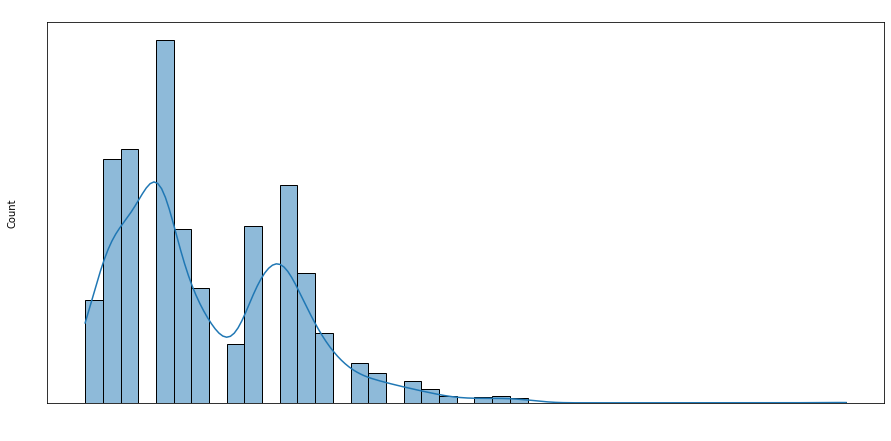

In [136]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
v2_daysincelastorder = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['DaySinceLastOrder'][OnlineRetail_V2['DaySinceLastOrder'] <40 ], kde=True)
v2_daysincelastorder.set_title('DaySinceLastOrder Column Distribution',color= 'white')
plt.xlabel('DaySinceLastOrder Values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

**The Majority of the customers fall into a value of 0 to 10 days since their last order, Hence, Targeting this segment would encourage them to reorder and reduce the 10 days cycle and increase sales.**

In [137]:
#Further Analysis on this point
#Seperating Churned and not churned customers
Churned = OnlineRetail_V2['Churn'] == 1

In [138]:
OnlineRetail_V2['DaySinceLastOrder'][Churned].describe() #Quick Statistical Summary

count    678.000000
mean       3.874631
std        3.468436
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       46.000000
Name: DaySinceLastOrder, dtype: float64

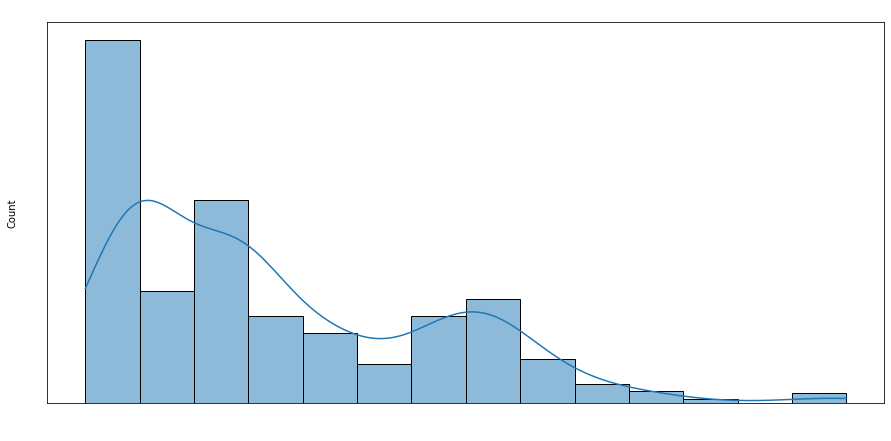

In [139]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
v2_daysincelastorder = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['DaySinceLastOrder'][Churned][OnlineRetail_V2['DaySinceLastOrder'] < 40 ], kde=True)
v2_daysincelastorder.set_title('DaySinceLastOrder Column Distribution',color= 'white')
plt.xlabel('DaySinceLastOrder Values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

**Approximately 50% of customers churn after 3 days of their lat order while 75% of customers churn after 6 days of their last order, Moreover, On avg, It takes customers from 3 to 4 days to churn after their last order**

##Q2) **Is there any difference in the buying behavior of male and female customers?**

In [140]:
OnlineRetail_V2['Gender'].value_counts()

Male      2738
Female    1855
Name: Gender, dtype: int64

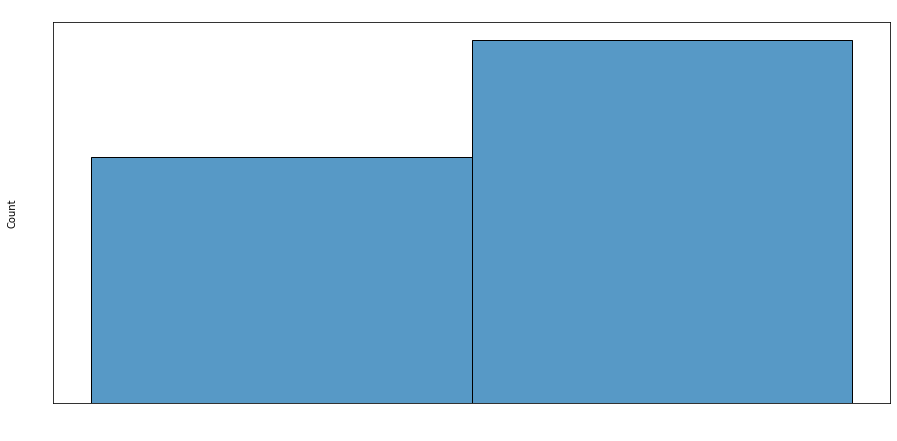

In [141]:
#Figuring out the distribution of gender
plt.figure(figsize=(15,7))
v2_gender = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Gender'])
v2_gender.set_title('Gender Column',color= 'white')
plt.xlabel('Gender Counts', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [142]:
#Further Analysis, Spliting Gender into Male and Female
male_cst = OnlineRetail_V2['Gender'] == 'Male' 

In [143]:
#Churned males percentage
OnlineRetail_V2['Gender'][male_cst][Churned].value_counts()
male_churn = 441/2738*100
male_churn

16.106647187728267

In [144]:
#Churned females percentage
OnlineRetail_V2['Gender'][~male_cst][Churned].value_counts()
female_churn = 237/1855*100
female_churn

12.776280323450134

**Approximately 16% of male customers churned and yet only 12% on female customers were churned**

In [145]:
#Further Analysis on the Gender behaviour
OnlineRetail_V2['HourSpendOnApp'][male_cst].describe()

count    2738.000000
mean        2.977721
std         0.708434
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: HourSpendOnApp, dtype: float64

In [146]:
OnlineRetail_V2['HourSpendOnApp'][~male_cst].describe()

count    1855.000000
mean        2.982749
std         0.728318
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: HourSpendOnApp, dtype: float64

**Females and Males spend almost the same number of hours on app**

In [147]:
OnlineRetail_V2['PreferredPaymentMode'][~male_cst].value_counts()

Debit Card          723
Credit Card         573
E wallet            234
Cash on Delivery    155
UPI                 104
Other                66
Name: PreferredPaymentMode, dtype: int64

In [148]:
OnlineRetail_V2['PreferredPaymentMode'][male_cst].value_counts()

Debit Card          1075
Credit Card          822
E wallet             294
Cash on Delivery     228
UPI                  215
Other                104
Name: PreferredPaymentMode, dtype: int64

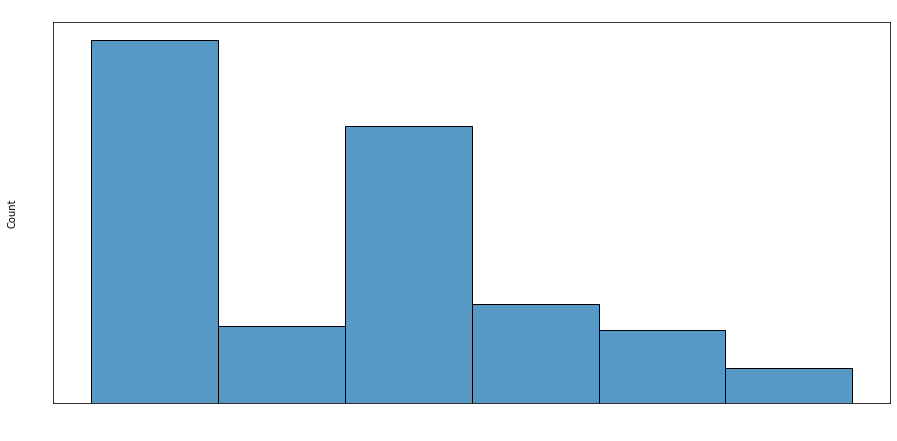

In [149]:
#Figuring out the distribution of preferred payment mode for males
plt.figure(figsize=(15,7))
v2_payment_males = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['PreferredPaymentMode'][male_cst])
v2_payment_males.set_title('Preferred Payment Mode Column',color= 'white')
plt.xlabel('Payment Modes for Males', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

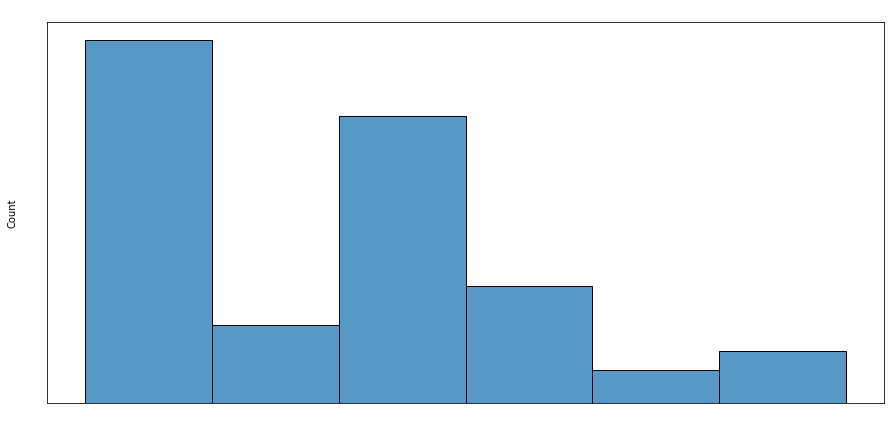

In [150]:
#Figuring out the distribution of preferred payment mode for females
plt.figure(figsize=(15,7))
v2_payment_females = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['PreferredPaymentMode'][~male_cst])
v2_payment_females.set_title('Preferred Payment Mode Column',color= 'white')
plt.xlabel('Payment Modes for Females', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

**Both genders have the same preferred payment mode**

In [151]:
OnlineRetail_V2['PreferedOrderCat'][male_cst].value_counts()

Laptop & Accessory    1106
Mobile Phone           807
Fashion                456
Grocery                199
Others                 170
Name: PreferedOrderCat, dtype: int64

In [152]:
OnlineRetail_V2['PreferedOrderCat'][~male_cst].value_counts()

Laptop & Accessory    795
Mobile Phone          457
Fashion               334
Grocery               188
Others                 81
Name: PreferedOrderCat, dtype: int64

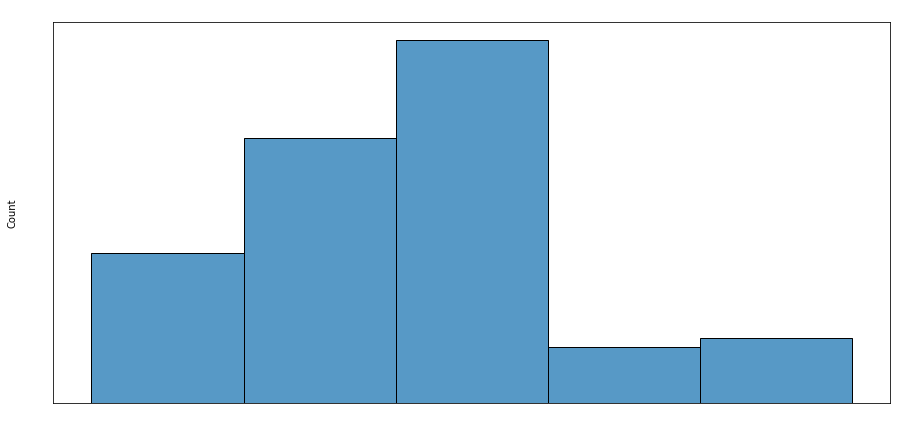

In [153]:
#Figuring out the distribution of preferred order category for males
plt.figure(figsize=(15,7))
v2_prefordercat_males = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['PreferedOrderCat'][male_cst])
v2_prefordercat_males.set_title('PreferedOrderCat Column Distribution',color= 'white')
plt.xlabel('Order Categories for Males', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

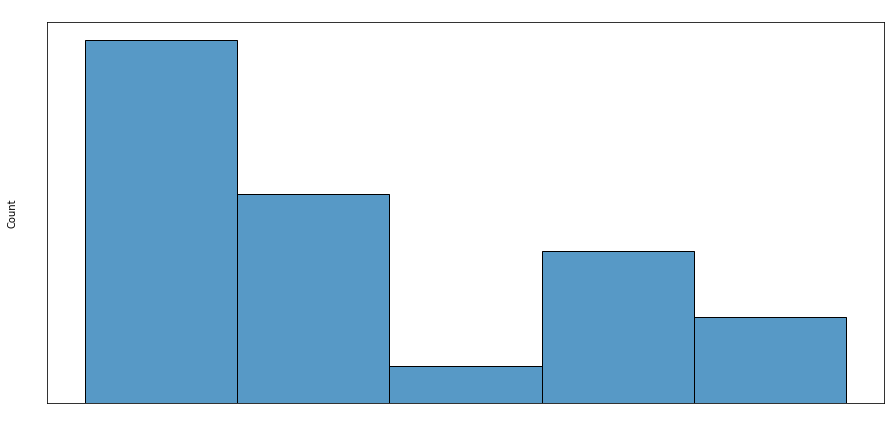

In [154]:
#Figuring out the distribution of preferred order category for females
plt.figure(figsize=(15,7))
v2_prefordercat_females = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['PreferedOrderCat'][~male_cst])
v2_prefordercat_females.set_title('PreferedOrderCat Column Distribution',color= 'white')
plt.xlabel('Order Categories for Females', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

**Both gender do have the same categories of interest**

In [155]:
OnlineRetail_V2['OrderCount'][male_cst].describe()

count    2738.000000
mean        3.165449
std         2.967862
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: OrderCount, dtype: float64

In [156]:
OnlineRetail_V2['OrderCount'][~male_cst].describe()

count    1855.000000
mean        3.309973
std         3.052645
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: OrderCount, dtype: float64

In [157]:
#Total number of males orders 
OnlineRetail_V2['OrderCount'][male_cst].sum()

8667

In [158]:
#Total number of females' orders 
OnlineRetail_V2['OrderCount'][~male_cst].sum()

6140

**Although female customers are less than male customers but on average a female customer tends to have an average of 3.309973 order versus 3.165449 per male**

In [159]:
OnlineRetail_V2['CashbackAmount'][male_cst].describe()

count    2738.000000
mean      185.095139
std        48.366856
min         0.000000
25%       150.670000
50%       168.420000
75%       203.980000
max       324.990000
Name: CashbackAmount, dtype: float64

In [160]:
OnlineRetail_V2['CashbackAmount'][~male_cst].describe()

count    1855.000000
mean      186.574755
std        47.109874
min         0.000000
25%       151.930000
50%       170.590000
75%       206.860000
max       324.730000
Name: CashbackAmount, dtype: float64

In [161]:
#Total cashback amount of males
round(OnlineRetail_V2['CashbackAmount'][male_cst].sum(),2)

506790.49

In [162]:
#Total cashback amount of females
round(OnlineRetail_V2['CashbackAmount'][~male_cst].sum(),2)

346096.17

**Males have the share of the lion when it comes to the cash-back amount**

##Q3) **Provide key insights on why our customers churn and possible churn indicators**

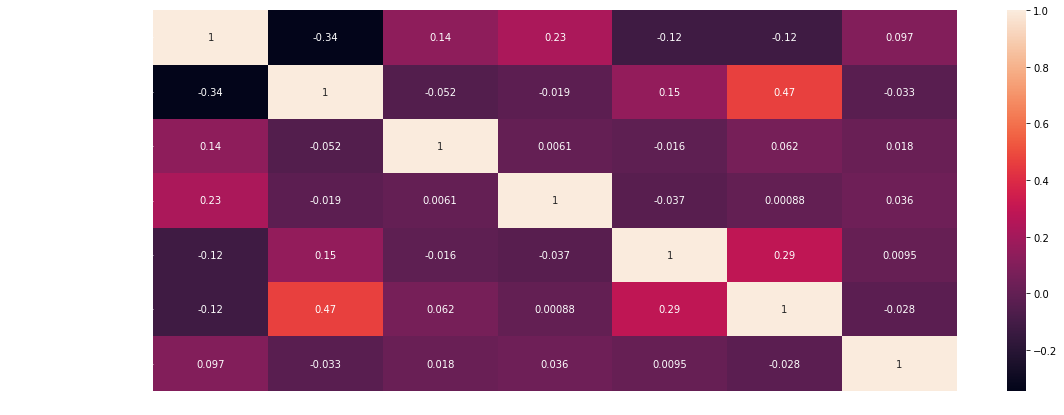

In [163]:
OnlineRetail_Subset = OnlineRetail_V2[['Churn','Tenure','NumberOfDeviceRegistered','Complain','DaySinceLastOrder','CashbackAmount','WarehouseToHome']]
#Let's figure out the correlation between churn and other columns
plt.figure(figsize=(18,7))
sns.heatmap(data = OnlineRetail_Subset.corr(), annot=True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

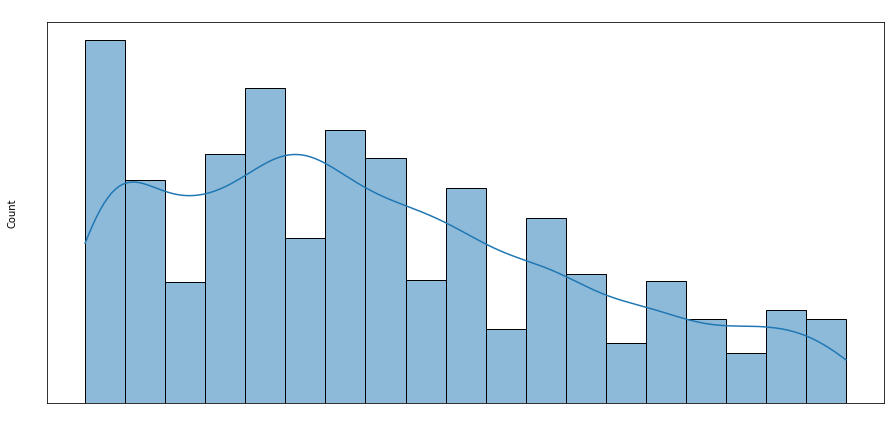

In [164]:
#Figuring out the distribution tenure values for not churned customers to compare it with the distribution of churned customers
plt.figure(figsize=(15,7))
v2_tenure_not_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Tenure'][~Churned],kde=True)
v2_tenure_not_churned.set_title('Tenure Column (Not Churned) Distribution',color= 'white')
plt.xlabel('Tenure values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

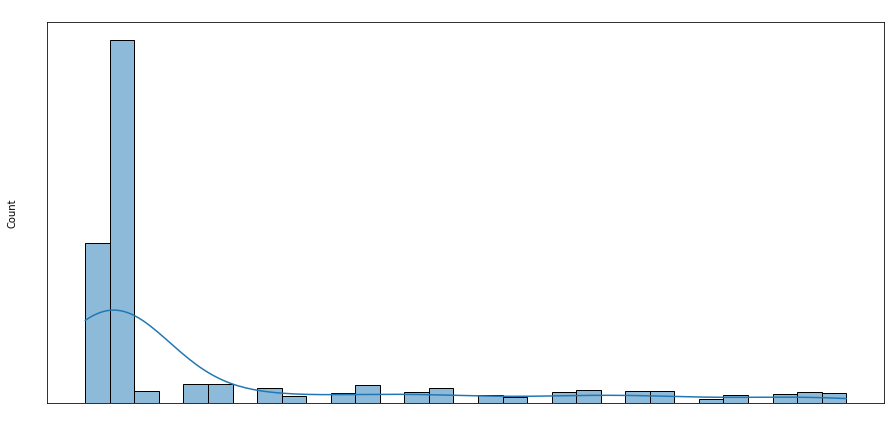

In [165]:
#Figuring out the distribution tenure values for churned customers
plt.figure(figsize=(15,7))
v2_tenure_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Tenure'][Churned],kde=True)
v2_tenure_churned.set_title('Tenure Column (Churned) Distribution',color= 'white')
plt.xlabel('Tenure values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [166]:
#Checking the average tenure for a churned customer
round(OnlineRetail_V2['Tenure'][Churned].mean(),2)

3.65

In [167]:
#Checking the average tenure for a current customer
round(OnlineRetail_V2['Tenure'][~Churned].mean(),2)

11.87

**Tenure is the first churn indicator, The average tenure of churned customer is 3.65 vs 11.87 for not churned customers, Hence, We should pay more attention to our new customers especially in their first 3.65 tenure period, In conclusion, The higher the tenure the higher the loyality the less churn possibility**

In [168]:
#Further Analysis
OnlineRetail_V2['Complain'][Churned].value_counts()

1    360
0    318
Name: Complain, dtype: int64

In [169]:
OnlineRetail_V2['Complain'][~Churned].value_counts()

0    2967
1     948
Name: Complain, dtype: int64

In [170]:
OnlineRetail_V2['Complain'].value_counts()

0    3285
1    1308
Name: Complain, dtype: int64

**Approximately 50% of the churned customers complained and hence we should pay attention to complains as it is the 2nd churn indicator**

##Q4) **Analyze The distance between the warehouse and the customer's home and check if it relates to complains?**

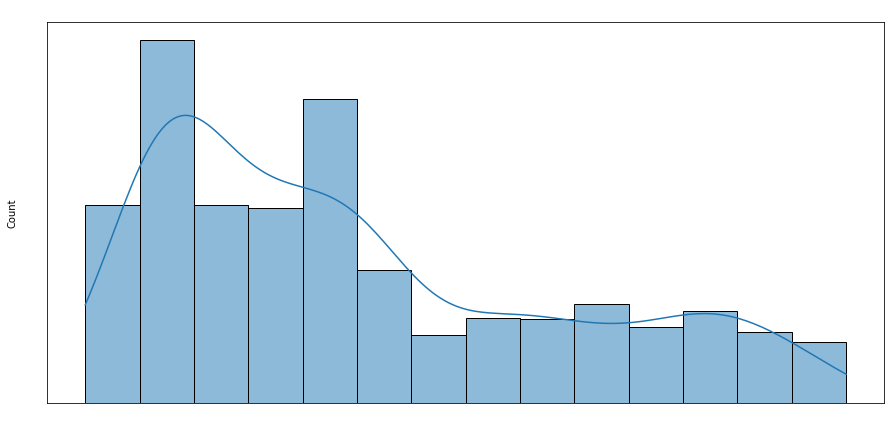

In [171]:
#Figuring out the distribution of WarehouseToHome values for current complaining customers
plt.figure(figsize=(15,7))
v2_warehouse_complain = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['WarehouseToHome'][OnlineRetail_V2['Complain']==1], kde=True)
v2_warehouse_complain.set_title('WarehouseToHome and Complained Distribution',color= 'white')
plt.xlabel('WarehouseToHome values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

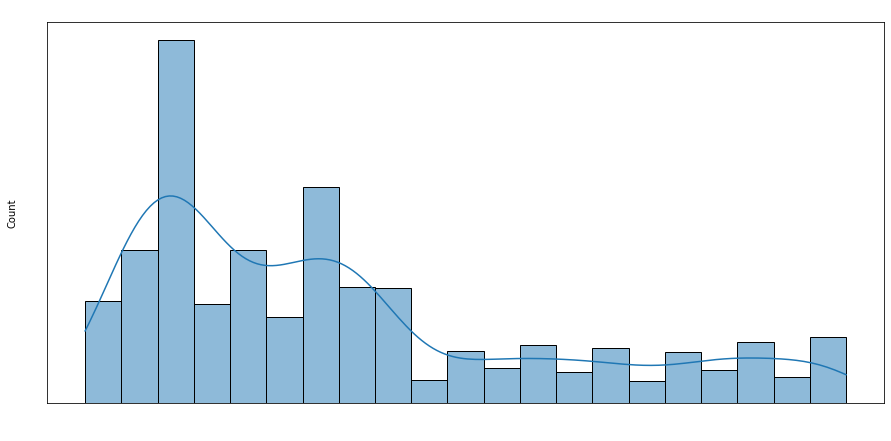

In [172]:
#Figuring out the distribution of WarehouseToHome values for current non-complaining customers
plt.figure(figsize=(15,7))
v2_warehouse_complain = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['WarehouseToHome'][OnlineRetail_V2['Complain']==0], kde=True)
v2_warehouse_complain.set_title('WarehouseToHome and non complained Distribution',color= 'white')
plt.xlabel('WarehouseToHome values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [173]:
OnlineRetail_V2['WarehouseToHome'].describe()

count    4593.000000
mean       15.755933
std         8.347883
min         5.000000
25%         9.000000
50%        14.000000
75%        21.000000
max        36.000000
Name: WarehouseToHome, dtype: float64

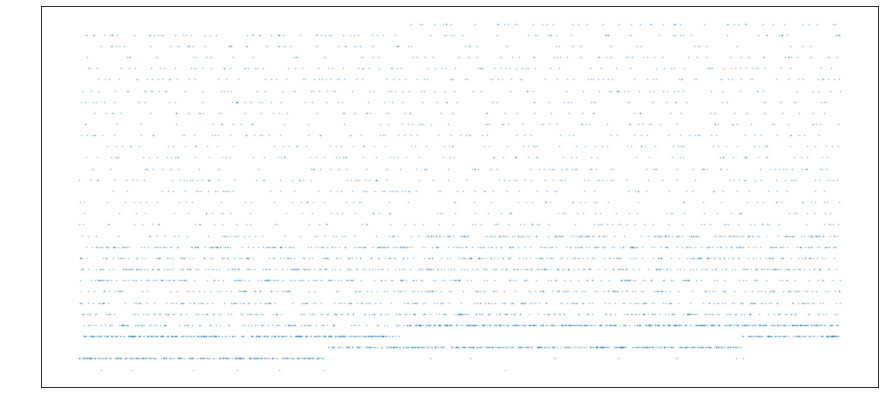

In [174]:
#checking the distribution and density of the distance between customers and our warhouses 
plt.figure(figsize=(15,7))
plt.plot(OnlineRetail_V2['WarehouseToHome'], 'o', markersize=1, alpha=0.2)
plt.ylabel('distance', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

**The majority of the customers are in the distance between 5 to 35 kms from warehouse and hence there's no relation between complains and warehouse to home distance**

##Q5) **does the number of addresses added by customers impact the churn rate?**

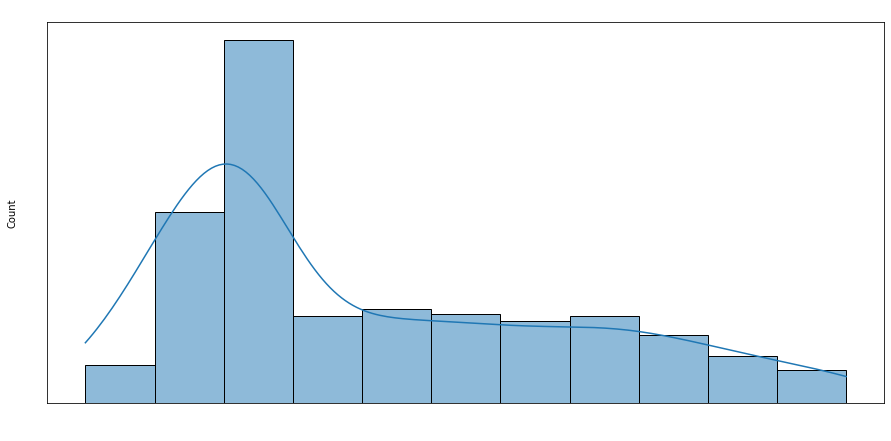

In [175]:
#checking if there any relation between number of addresses and churn 
plt.figure(figsize=(15,7))
v2_numberofaddress_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['NumberOfAddress'][Churned],kde=True)
v2_numberofaddress_churned.set_title('NumberOfAddress Churned Distribution',color= 'white')
plt.xlabel('NumberOfAddress values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

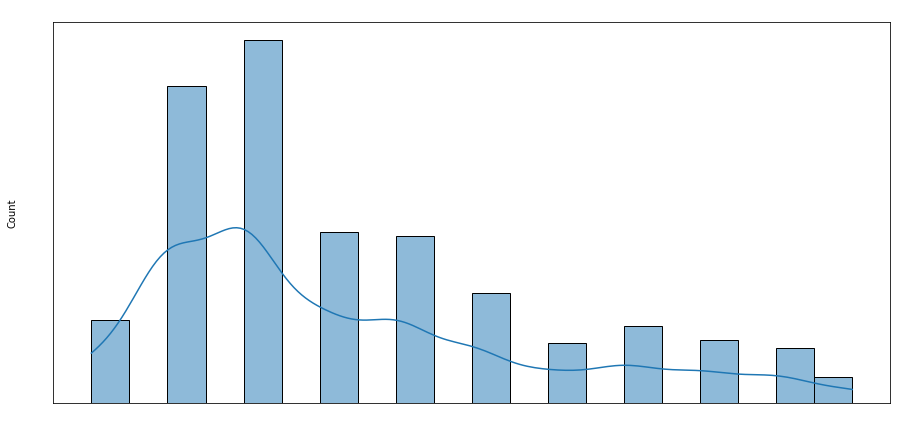

In [176]:
#checking if there any relation between number of addresses and churn 
plt.figure(figsize=(15,7))
v2_numberofaddress_not_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['NumberOfAddress'][~Churned],kde=True)
v2_numberofaddress_not_churned.set_title('NumberOfAddress not churned Distribution',color= 'white')
plt.xlabel('NumberOfAddress values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [177]:
OnlineRetail_V2['NumberOfAddress'][Churned].describe()

count    678.000000
mean       4.725664
std        2.676274
min        1.000000
25%        3.000000
50%        3.000000
75%        7.000000
max       11.000000
Name: NumberOfAddress, dtype: float64

In [178]:
OnlineRetail_V2['NumberOfAddress'][~Churned].describe()

count    3915.000000
mean        4.301149
std         2.515559
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        11.000000
Name: NumberOfAddress, dtype: float64

**In terms of Number of addresses for churned and not churned customers, There's in fact no difference and hence the number of addresses doesn't have an impact on the churn rate**